In [2]:
# Import required libraries and functions
from acquire import get_telco_data
from prepare import train_validate_test_split, prep_telco
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# Acquire and Prepare Telco Churn Data

To acquire the Telco churn data I used the telco_churn database in our mySQL server and selected all columns from the customers, contract types, payment types, and internet service types

In [4]:
# Acquire data from sql database telco_churn
df = get_telco_data()

Using cached data


## Prepare Steps:
- Drop null/blank values. From prior exploration of dataset a small number of the total_charges are just whitespace - these are all new customers who haven't been with the company for >1 month. Given that it is a very small proportion of the total dataset (11 rows) these rows will be deleted for ease of computation later on
- Convert total_charges to float data type for later analysis as a continuous variable
- Encode categorical variables and rename:
        - senior citizen
        - sex
        - has phone
        - has internet service
        - has partner
        - has dependent
        - has paperless billing
        - is month to month contract type
        - on autopay
        - has streaming service
- Remove unnecessary columns after encoding

In [5]:
df = prep_telco(df)
train, validate, test = train_validate_test_split(df, target = 'churn', seed =123)

- The data is now split into 3 samples so that we can use the train sample to explore, fit the models, and evaluate without looking at new data
- The validate set is used to verify the models built are not overfit to the train dataset
- The test set will give an indicatio of how the model performs on unseen future data

# Explore

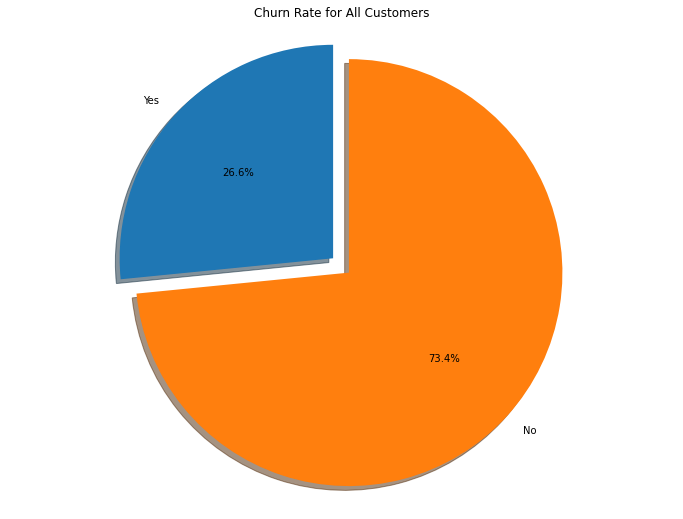

In [15]:
# Baseline churn 
churn_df = pd.DataFrame({'Yes':train.churn.sum(),'No':(train.churn == 0).sum()}, index = ['Churn']).T
labels = churn_df.index
sizes = churn_df.Churn
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12,9))
p = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
p = ax1.axis('equal')
p = plt.title('Churn Rate for All Customers')